# 4 Evaluation Metrics for Classification

Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [1]:
# !kaggle datasets download blastchar/telco-customer-churn
# !unzip telco-customer-churn.zip && rm telco-customer-churn.zip

# Data preparation

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Clean column names and categorical variables

In [4]:
# easy way to see all columns in dataframe
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# clean categorical column data as well
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Clean numerical variables

In [6]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


# Setting up the validation framework

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [9]:
(20/80) * 100

25.0

In [10]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

In [11]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [12]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [13]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [14]:
# delete to avoid using it as a feature by mistake - to avoid data leakage and overfitting
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [15]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = list(set(df.columns.to_list()) - set(numerical + ['churn', 'customerid']))

# One-hot encoding
Used to encode categorical variables into numerical variables

In [16]:
from sklearn.feature_extraction import DictVectorizer

In [17]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

X_train.shape

(4225, 45)

In [18]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

# Training logistic regression with scikit-learn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train) # train the model

LogisticRegression()

In [21]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00902924, 0.20485706, 0.21251995, ..., 0.13660855, 0.7995909 ,
       0.83722192])

In [22]:
churn_decision = y_pred >= 0.5 # default for sklearn predict is also 0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [23]:
# get accuracy of the model
(y_val == churn_decision.astype(int)).mean() # 80% accuracy

np.float64(0.8034066713981547)

# 4.2 Accuracy & Dummy Model

**Accuracy:** Tells us about fraction of correct predictions

In [24]:
# accuracy
(y_val == churn_decision).sum() / len(y_val)

np.float64(0.8034066713981547)

## Evaluate the model on different thresholds

In [25]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)

scores = []

for threshold in thresholds:
    churn_decision = y_pred >= threshold
    score  =  accuracy_score(y_val, churn_decision)

    print(f"Threshold: {threshold:.2f}, Score: {score:.3f}")
    scores.append(score)

Threshold: 0.00, Score: 0.274
Threshold: 0.05, Score: 0.509
Threshold: 0.10, Score: 0.591
Threshold: 0.15, Score: 0.666
Threshold: 0.20, Score: 0.710
Threshold: 0.25, Score: 0.739
Threshold: 0.30, Score: 0.760
Threshold: 0.35, Score: 0.772
Threshold: 0.40, Score: 0.785
Threshold: 0.45, Score: 0.793
Threshold: 0.50, Score: 0.803
Threshold: 0.55, Score: 0.801
Threshold: 0.60, Score: 0.795
Threshold: 0.65, Score: 0.786
Threshold: 0.70, Score: 0.765
Threshold: 0.75, Score: 0.744
Threshold: 0.80, Score: 0.735
Threshold: 0.85, Score: 0.726
Threshold: 0.90, Score: 0.726
Threshold: 0.95, Score: 0.726
Threshold: 1.00, Score: 0.726


In [26]:
# Find the index of the highest score
max_score_index = np.argmax(scores)
max_score_threshold = thresholds[max_score_index]
max_score = scores[max_score_index]
max_score_threshold, max_score

(np.float64(0.5), 0.8034066713981547)

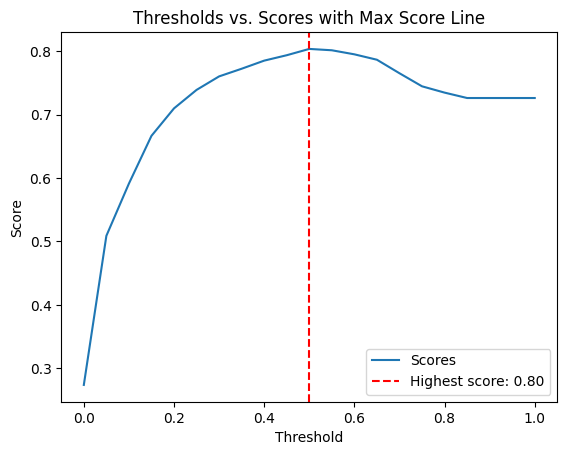

In [27]:
# Plot the thresholds and scores
plt.plot(thresholds, scores, label='Scores')

# Draw a vertical line at the threshold with the highest score
plt.axvline(x=max_score_threshold, color='red', linestyle='--', label=f'Highest score: {max_score:.2f}')

# Add labels and a legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Thresholds vs. Scores with Max Score Line')
plt.legend()

### Interprating first and last threshold

- Thresold of 1 predicts that all customers are non-churning. The model does actually perform well as 72.6% accuracy. This is our **dummy model**
- Accuracy isn't the best measure for evaluating the model. It shows us that we only had an increase of ~7% in churn rate when we compare our model to the dummy model
- Threshold of 0 predicts that all customers are churning. The score is really bad at 27.4% accuracy. This is the lowest score in the list. The score is low because we have a lot more non-churning customers than churning customers
- The difference in accuracy between the two is because of **class imbalance**. We have more non-churning vs churning customers. The ratio is ~3:1
- Accuracy is a score thats misleading for imbalanced datasets. If we predict the majority class using a dummy model, it does make it appear that its good enough
- There are better evaluation metrics for imbalanced datasets

In [28]:
from collections import Counter

# thresold of 1 predicts that all customers are non-churning
Counter(y_pred > 1)

Counter({np.False_: 1409})

In [29]:
(y_val == 0).mean()

np.float64(0.7260468417317246)

In [30]:
Counter(y_pred > 0)

Counter({np.True_: 1409})

In [31]:
(y_val == 1).mean()

np.float64(0.2739531582682754)

In [32]:
# more non-churning than churning users
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

# 4.3 Confusion table

- Churn: positive class
- No churn: negative class
- Correct decisions: true positives and true negatives
- Incorrect decisions: false positives and false negatives

## Prediction categoreies
- Prediction is that the customer WILL churn. This is known as the **Positive class**
    - And Customer actually churned - Known as a **True Positive (TP)**
    - But Customer actually did not churn - Known as a **False Positive (FP)**
- Prediction is that the customer WILL NOT churn - This is known as the **Negative class**
    - Customer did not churn - **True Negative (TN)**
    - Customer churned - **False Negative (FN)**

<u>**Confusion Table**</u> is a way to summarize the above results in a tabular format, as shown below: 

<table>
  <thead>
    <tr>
      <th></th>
      <th colspan="2"><b>Predictions</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>Actual</b></td>
      <td><b>Negative</b></td>
      <td><b>Positive</b></td>
    </tr>
   <tr>
      <td><b>Negative</b></td>
      <td>TN</td>
      <td>FP</td>
    </tr>
    <tr>
      <td><b>Positive</b></td>
      <td>FN</td>
      <td>TP</td>
    </tr>
  </tbody>
</table>

The **accuracy** corresponds to the sum of TN and TP divided by the total of observation

In [33]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [34]:
threshold = 0.5

predict_positive = (y_pred >= threshold)
predict_negative = (y_pred < threshold)

## True positive predictions

In [35]:
# element-wise logistical AND
tp = (predict_positive & actual_positive).sum()
tp

np.int64(210)

In [36]:
predict_positive[-5:]

array([False, False, False,  True,  True])

In [37]:
actual_positive[-5:]

array([False,  True, False,  True,  True])

In [38]:
# predictions look good, true when both are true, false otherwise
(predict_positive & actual_positive)[-5:]

array([False, False, False,  True,  True])

# Other confusion table values

In [39]:
tn = (predict_negative & actual_negative).sum()
tn


np.int64(922)

In [40]:
fp = (predict_positive & actual_negative).sum()
fp

np.int64(101)

In [41]:
fn = (predict_negative & actual_positive).sum()
fn

np.int64(176)

## Confusion matrix
![Confusion matrix](https://www.kdnuggets.com/wp-content/uploads/selvaraj_confusion_matrix_precision_recall_explained_12.png)

- We have more false negatives than false positives
- 176 people leave because we didn't send them emails with discount codes and we sent 101 discount codes to customers who weren't going to churn

In [42]:

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [43]:
normalized_confusion_matrix = (confusion_matrix / confusion_matrix.sum()).round(2)
normalized_confusion_matrix

array([[0.65, 0.07],
       [0.12, 0.15]])

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred >= threshold, normalize='all').round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

# 4.4 Precision and recall

- **Precision**: Fraction of positive predictions that are correct. Fraction of correct churning predictions. 
- **Recall**: Fraction of churning users that were identified correcly.

In [45]:
precision = tp / (tp + fp)
precision

np.float64(0.6752411575562701)

In [46]:
recall = tp / (tp + fn)
recall

np.float64(0.5440414507772021)

# 4.5 ROC curves

- A receiver operating characteristic (ROC) curve is a graph that shows how well a binary classifier model performs at different threshold values
- We are interested in the false positive rate (FPR) and the true positive rate (TPR) which are calculated from the confusion matrix
- **FPR** is the fraction of false positives (FP) divided by the total number of negatives (FP and TN - the first row of confusion matrix), and we want to `minimize` it. The formula of FPR is the following: 

$FPR = \large \frac{FP}{TN + FP}$

- On the other hand, **TPR** or **Recall** is the fraction of true positives (TP) divided by the total number of positives (FN and TP - second row of confusion table), and we want to `maximize` this metric. The formula of this measure is presented below: 

$TPR =\large \frac{TP}{TP + FN}$


## TPR and FRP

In [47]:
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

tpr, fpr

(np.float64(0.5440414507772021), np.float64(0.09872922776148582))

In [48]:
scores = []

threshold = np.linspace(0, 1, 101)

for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))


In [49]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores[::10] # print every 10th row

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,75,20,311,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [50]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,20,311,1003,0.194301,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


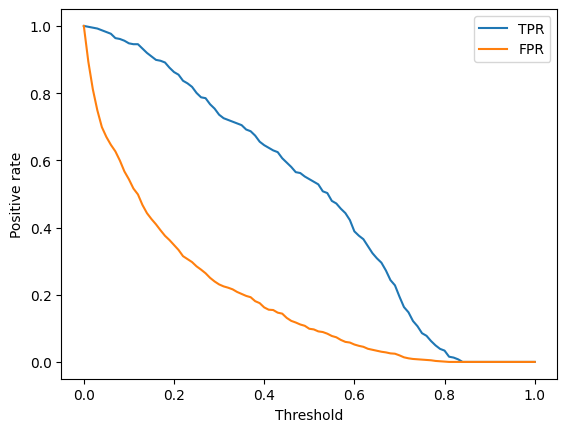

In [51]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.xlabel('Threshold')
plt.ylabel('Positive rate')
plt.legend()

## Random model

- Baseline model

In [52]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [53]:
# get accuracy of random model
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [54]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    threshold = np.linspace(0, 1, 101)

    for t in threshold:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores


In [55]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


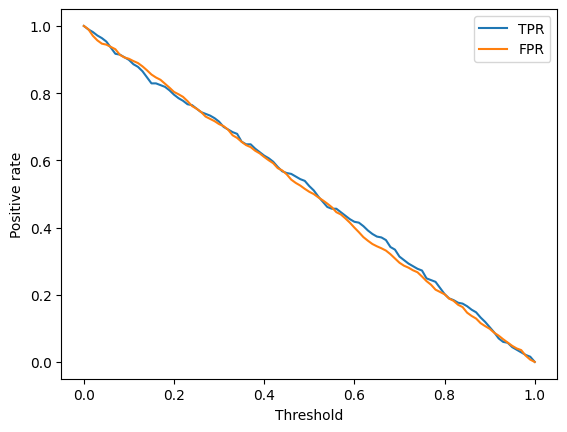

In [56]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.xlabel('Threshold')
plt.ylabel('Positive rate')
plt.legend()

## Ideal model
- Different benchmark
- An ideal scoring model: correctly identifies churning and non-churning customers. This model doesn't exist in practice

In [57]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos

(np.int64(1023), np.int64(386))

In [58]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [60]:
ideal_threshold = 1 - y_val.mean()
ideal_threshold

np.float64(0.7260468417317246)

In [61]:
((y_ideal_pred >= ideal_threshold) == y_ideal).mean() # everything is correct

np.float64(1.0)

In [62]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


- True positive rate almost always stays at 1 before it starts dropping at the threshold of 0.726
- False positive rate becomes 0 at the threshold of 0.726

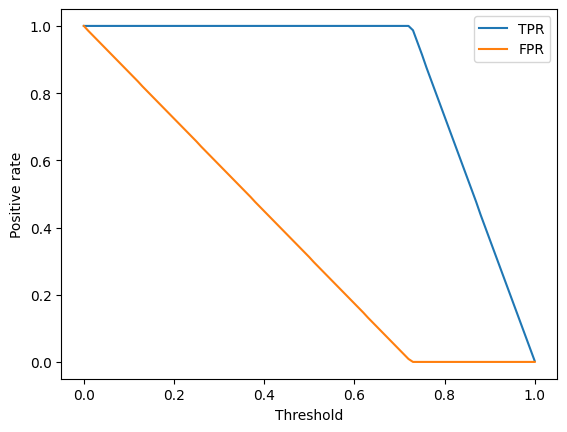

In [63]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.xlabel('Threshold')
plt.ylabel('Positive rate')
plt.legend()

## Plotting all models together

- We need to compare the ROC curves against a point of reference to evaluate its performance, so the corresponding curves of random and ideal models are required
- We want our model threshold to be close to the ideal model


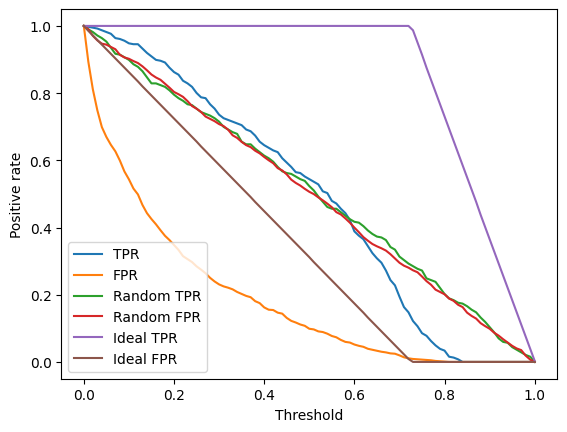

In [64]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')

plt.plot(df_rand.threshold, df_rand.tpr, label='Random TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='Random FPR')

plt.plot(df_ideal.threshold, df_ideal.tpr, label='Ideal TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='Ideal FPR')

plt.xlabel('Threshold')
plt.ylabel('Positive rate')
plt.legend()

When TPR is 100% and FPR is 0% that's when we have the best threshold of 0.726

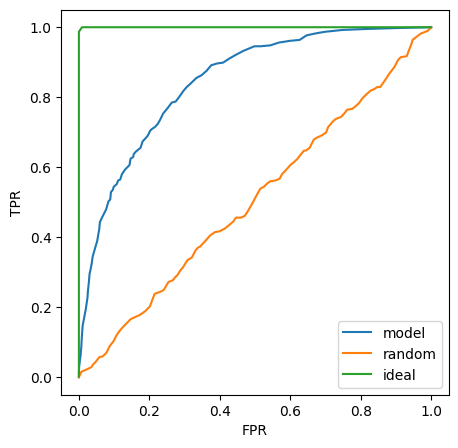

In [65]:
plt.figure(figsize=(5, 5)) # ROC curve is square

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

- We want the model to be closer to the ideal spot at coordinate (0, 1) and far away from the random baseline
- We can use the ROC curve to compare different models

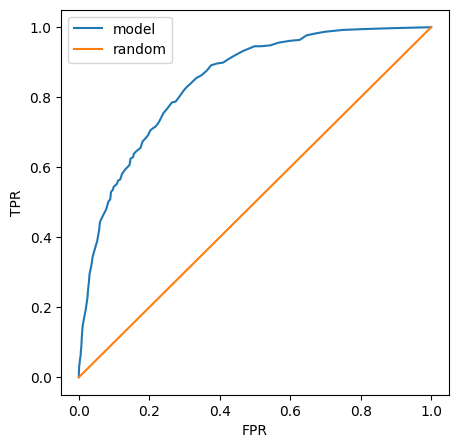

In [66]:
plt.figure(figsize=(5, 5)) # ROC curve is square

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 1], [0, 1], label='random')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [67]:
from sklearn.metrics import roc_curve

In [68]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [69]:
len(fpr)

401

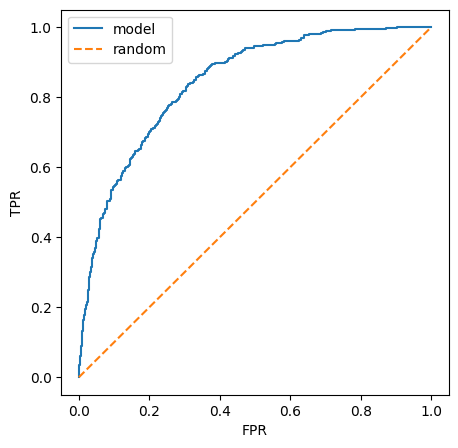

In [70]:
plt.figure(figsize=(5, 5)) # ROC curve is square

plt.plot(fpr, tpr, label='model') # a little bumpy as it computes more points
plt.plot([0, 1], [0, 1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# 4.6 ROC AUC

- AUC: Area under the curve
- AUC is used to measure how close we are to the ideal point. TPR of 1 and FPR of 0 is the ideal point
- AUC of random model is 0.5 and that of ideal model is 1. Our model should therefore have ROC between 0.5 and 1
- AUC: Tells us the probability that a randomly selected positive example has a higher score than a randomly selected negative example
- AUC is very popular as a way to measure performance of binary classifications as its quite intuitive

In [71]:
from sklearn.metrics import auc

In [72]:
auc(fpr, tpr)

np.float64(0.84380492202655)

In [73]:
auc(df_scores.fpr, df_scores.tpr) # reasonably close with fewer points

np.float64(0.8438403760148705)

In [74]:
auc(df_ideal.fpr, df_ideal.tpr) # very close to 1

np.float64(0.9999430203759136)

In [75]:
auc(df_rand.fpr, df_rand.tpr)

np.float64(0.5060233793728696)

In [76]:
from sklearn.metrics import roc_auc_score

In [77]:
roc_auc_score(y_val, y_pred) # compute tpr, fpr and auc all at once

np.float64(0.84380492202655)

In [78]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

## AUC in practice

In [79]:
import random

n = 500000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success += 1

success / n

0.844074

In [80]:
# easier comparison using numpy
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.843374)

# 4.7 Cross-Validation

Cross-validations refers to evaluating the same model on different subsets of a dataset, getting the average prediction, and spread within predictions. This method is applied in the parameter tuning step, which is the process of selecting the best parameter.

In this algorithm, the full training dataset is divided into k partitions, we train the model in k-1 partitions of this dataset and evaluate it on the remaining subset. Then, we end up evaluating the model in all the k folds, and we calculate the average evaluation metric for all the folds.

In general, if the dataset is large, we should use the hold-out validation dataset strategy. On the other hand, if the dataset is small or we want to know the standard deviation of the model across different folds, we can use the cross-validation approach.

Number of splits can be determined by the dataset size. For small data 2 or 3 splits are enough. For large data, we can use 10, 20, or more splits.


In [81]:
def train(df_train, y_train, C=1.0):
    # C: regularization parameter
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [82]:
dv, model = train(df_train, y_train, C=0.001)

In [83]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [84]:
predict(df_val, dv, model)

array([0.02500376, 0.23981413, 0.24624888, ..., 0.24671448, 0.75573482,
       0.75902629])

In [85]:
from sklearn.model_selection import KFold

In [86]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [87]:
train_idx, val_idx = next(kfold.split(df_full_train)) # to see the values

len(train_idx), len(val_idx), len(df_full_train)

(5070, 564, 5634)

In [88]:
from tqdm.auto import tqdm

In [89]:
n_splits = 5

# parameter tuning the regularization parameter C
for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    scores = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in tqdm(kfold.split(df_full_train), total=n_splits):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)

        scores.append(auc)

    print(f"C={C} -> {np.mean(scores):.3f} +- {np.std(scores):.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

C=0.001 -> 0.825 +- 0.009


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.01 -> 0.840 +- 0.008


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.1 -> 0.842 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.5 -> 0.842 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=1 -> 0.842 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=5 -> 0.842 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=10 -> 0.842 +- 0.007


## Train on full dataset

In [90]:
# could have alse used C = 0.1, 0.5, 5, 10 as the mean and std dev was the same
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0) 
y_pred = predict(df_val, dv, model)

auc = roc_auc_score(y_val, y_pred)
auc # slight improvement

np.float64(0.8585077343039127)

# 4.8 Summary

- Metric: A single number that describes the performance of a model
- Accuracy: Fraction of correct answers; sometimes misleading
- Precision and recall are less misleading when we have class imbalance
- ROC Curve: A way to evaluate the performance at all thresholds; okay to use with imbalance
- K-Fold CV: More reliable estimate for performance (mean + std)

In brief, this weeks was about different metrics to evaluate a binary classifier. These measures included accuracy, confusion table, precision, recall, ROC curves(TPR, FPR, random model, and ideal model), and AUROC. Also, we talked about a different way to estimate the performance of the model and make the parameter tuning with cross-validation.

